In [1]:
import logging
import numpy as np
import matplotlib.pyplot as plt

import theano_shim as shim
import sinn
import sinn.histories as histories
from sinn.histories import Spiketrain, Series
import sinn.iotools as io
import sinn.analyze as anlz
from sinn.analyze.heatmap import HeatMap
import sinn.optimize.gradient_descent as gd

import main
import fsgif_model as fsgif

import copy


np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

try:
    # Guard against defining multiple loggers
    logger
except NameError:
    rootlogger = logging.getLogger()
    rootlogger.setLevel(sinn.LoggingLevels.MONITOR)

    sthandler = logging.StreamHandler()
    sthandler.setLevel(logging.INFO)
    sthandler.setFormatter(sinn.config.logging_formatter)
    rootlogger.addHandler(sthandler)
    
    filehandler = logging.handlers.RotatingFileHandler(
        'fsgif.log', mode='w', maxBytes=5e5, backupCount=5)
    filehandler.setLevel(sinn.LoggingLevels.MONITOR)
    filehandler.setFormatter(sinn.config.logging_formatter)
    rootlogger.addHandler(filehandler)
    
    logger = logging.getLogger('fsgif')
    logger.setLevel(logging.INFO)

In [2]:
datalen=4.0

In [3]:
Ihist_spikes = histories.Series.from_raw(io.loadraw("data/short_adap/spikes/fsgif_sin-input_10s_314seed_input.sir"))

In [4]:
Ihist = anlz.subsample(Ihist_spikes, 
                       np.rint(main.mf_dt / main.spike_dt).astype('int'))

In [6]:
params = main.get_params()[0]

In [6]:
params = params._replace(w=((0.465, -0.702),(0.176,-0.702)))

In [7]:
params.w

((0.465, -0.702), (0.176, -0.702))

In [7]:
mfmodel = main.init_mean_field_model(input_history=Ihist, datalen=datalen,
                                    model_params=params)

In [8]:
mfmodel.A.compute_up_to('end')

(0, 35)

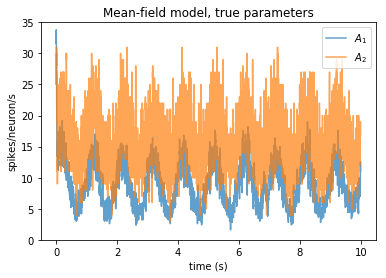

In [9]:
plt.title("Mean-field model, true parameters")
anlz.plot(anlz.smooth(mfmodel.A, 10), alpha=0.7)
plt.xlabel("time (s)")
plt.ylabel("spikes/neuron/s")
plt.legend(["$A_1$", "$A_2$"])
plt.ylim((0,35))

(0, 35)

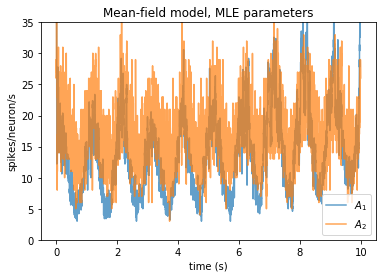

In [11]:
plt.title("Mean-field model, MLE parameters")
anlz.plot(anlz.smooth(mfmodel.A, 10), alpha=0.7)
plt.xlabel("time (s)")
plt.ylabel("spikes/neuron/s")
plt.legend(["$A_1$", "$A_2$"])
plt.ylim((0,35))